In [1]:
import numpy as np
# import pandas as pd
import scanpy as sc
import seaborn as sb
import matplotlib.pyplot as plt
# from matplotlib import rcParams
%matplotlib inline
# import seaborn as sns
import scipy.sparse
# import cmasher as cmr
# from natsort import natsorted
import sys 
import os
import joblib
# from imblearn.over_sampling import SMOTE
# from collections import Counter
# import sc_module as sm
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
# from collections import OrderedDict
# import decoupler as dc

sc.settings.verbosity = 3 # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80)

scanpy==1.10.3 anndata==0.10.9 numpy==2.0.2 scipy==1.13.1 pandas==2.2.3 scikit-learn==1.5.2 statsmodels==0.14.4 pynndescent==0.5.13


In [2]:
sys.path.append(os.path.abspath(r"C:\\Users\\Beta\\Desktop\\Coding\\Research\\McKinnon-Rosati-Laboratory\\Project 1"))


In [3]:
clustered_file = "/Users/Beta/Desktop/Coding/Research/McKinnon-Rosati-Laboratory/Project 1/granulomas_final.h5ad"

In [4]:
# clustered data
adata = sc.read_h5ad(clustered_file)
adata.uns['log1p']["base"] = None # bug fix

# print(adata.obs['sample'].value_counts())
print(adata.var)

# print()
# print('X matrix is sparse:', scipy.sparse.issparse(adata.X))
# print('X size =', adata.X.shape)

                          gene_ids    feature_types  n_cells-0  \
Xkr4            ENSMUSG00000051951  Gene Expression        270   
Gm1992          ENSMUSG00000089699  Gene Expression          8   
Gm19938         ENSMUSG00000102331  Gene Expression         11   
Gm37381         ENSMUSG00000102343  Gene Expression        119   
Rp1             ENSMUSG00000025900  Gene Expression        396   
...                            ...              ...        ...   
CR974586.2      ENSMUSG00000095585  Gene Expression          7   
CR974586.4      ENSMUSG00000096506  Gene Expression          4   
4933409K07Rik   ENSMUSG00000095552  Gene Expression          5   
CAAA01147332.1  ENSMUSG00000095742  Gene Expression        273   
AC149090.1      ENSMUSG00000095041  Gene Expression       4789   

                n_cells_by_counts-0  mean_counts-0  pct_dropout_by_counts-0  \
Xkr4                            270       0.051697                97.529509   
Gm1992                            8       0.00073

In [5]:
adata

AnnData object with n_obs × n_vars = 27603 × 23693
    obs: 'scDblFinder_score', 'scDblFinder_class', 'doublet', 'n_genes_by_counts', 'total_counts', 'type', 'sample', 'batch_type', 'batch', 'log1p_n_genes_by_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'pct_counts_hb', 'n_genes', 'n_counts', 'size_factors', 'leiden_0.2', 'leiden_0.3', 'leiden_0.4', 'leiden_0.6', 'leiden_0.8', 'leiden_1.0', 'leiden_1.4', 'leiden_1.7', 'leiden_2.0', 'leiden_2.5', 'leiden_3.0', 'leiden_3.5', 'leiden_4.0', 'leiden_4.5', 'hclust', 'kmeans', 'my_clust_1', 'immune', 'mesothelial', 'stromal', 'endothelial', 'epithelial', 'muscle', 'Immune', 'Myeloid', 'Lymphoid', 'Mesenchyme', 'Mesothelial', 'Stromal', 'SMC', 'Endothelial', 'Blood vessels', 'LEC', 'Epithelial', 'Ciliated', 'Secretory'
    var: 'gene_ids', 'fe

In [6]:
cluster_type = 'my_clust_1'

In [7]:
adata.obs[cluster_type]

AAACCTGAGCGTAGTG_sc69_1     6
AAACCTGAGCTGATAA_sc69_1     3
AAACCTGCAAATCCGT_sc69_1     4
AAACCTGCAAGGGTCA_sc69_1    13
AAACCTGCACATCCGG_sc69_1     4
                           ..
TTTGTCAGTTCAACCA_sc72_1     4
TTTGTCAGTTCAGTAC_sc72_1     8
TTTGTCATCACAAACC_sc72_1     4
TTTGTCATCAGCACAT_sc72_1     4
TTTGTCATCTCGAGTA_sc72_1    22
Name: my_clust_1, Length: 27603, dtype: category
Categories (30, object): ['0', '10', '11', '11b', ..., '7c', '8', '9', '9b']

In [8]:
annotation_dict= {
'9': 'CAP1',
'24': 'CAP2',
'9b': 'VEC',
'27': 'LEC',
    
'17': 'Ciliated',
'15': 'Secretory',
'22': 'AT1',
'6': 'AT2',
'12': 'AT2-t1',
'19': 'AT2-t2',
    
'18': 'AF1',
'14': 'AF2',
'25': 'Pericyte',
    
'20': 'Mesothelial',
    
'3': 'B1',
'3b': 'B2',
    
'0': 'Th1',
'8': 'T_naive',
'11': 'T_ex',
'77': 'Treg',
    
'11b': 'NK',
    
'4a': 'AM',
'4': 'M-t1',
'10': 'M-lc',
'7': 'M-t2',
'7b': 'M-C1q',
'7c': 'iMon',
    
'23': 'pDC',
'13': 'DC',
'5b': 'N1',
'5': 'N2',
}

In [9]:
# Add cell type column based on annotation
adata.obs['cell_type_edit'] = [annotation_dict[clust] for clust in adata.obs[cluster_type]]

# Error checking
dict_list = list(annotation_dict.keys())
adata_list = list(adata.obs['my_clust_1'].unique())
print('Keys in dictionary not in adata:', [item for item in dict_list if item not in adata_list] )
print('Keys in adata not in dictionary:', [item for item in adata_list if item not in dict_list] )

Keys in dictionary not in adata: ['18']
Keys in adata not in dictionary: []


In [10]:
adata.obs['cell_type_edit']

AAACCTGAGCGTAGTG_sc69_1        AT2
AAACCTGAGCTGATAA_sc69_1         B1
AAACCTGCAAATCCGT_sc69_1       M-t1
AAACCTGCAAGGGTCA_sc69_1         DC
AAACCTGCACATCCGG_sc69_1       M-t1
                            ...   
TTTGTCAGTTCAACCA_sc72_1       M-t1
TTTGTCAGTTCAGTAC_sc72_1    T_naive
TTTGTCATCACAAACC_sc72_1       M-t1
TTTGTCATCAGCACAT_sc72_1       M-t1
TTTGTCATCTCGAGTA_sc72_1        AT1
Name: cell_type_edit, Length: 27603, dtype: object

In [11]:
# collect unique cells
unique_celltype_sub = adata.obs['cell_type_edit'].unique()
print(unique_celltype_sub)

# count num unique cells
num_unique_celltype_sub = adata.obs['cell_type_edit'].nunique()
print(f"Number of unique sub cell types: {num_unique_celltype_sub}")

['AT2' 'B1' 'M-t1' 'DC' 'Th1' 'M-t2' 'Secretory' 'AM' 'N1' 'M-C1q'
 'AT2-t2' 'AF2' 'VEC' 'CAP1' 'N2' 'AT2-t1' 'Pericyte' 'pDC' 'Ciliated'
 'NK' 'AT1' 'T_naive' 'Treg' 'M-lc' 'Mesothelial' 'T_ex' 'CAP2' 'LEC'
 'iMon' 'B2']
Number of unique sub cell types: 30


In [12]:
# map cell types to integers
replacement_dict = {
    'AT2': 0,
    'B1': 1,
    'M-t1': 2,
    'DC': 3,
    'Th1': 4,
    'M-t2': 5,
    'Secretory': 6,
    'AM': 7,
    'N1': 8,
    'M-C1q': 9,
    'AT2-t2': 10,
    'AF2': 11,
    'VEC': 12,
    'CAP1': 13,
    'N2': 14,
    'AT2-t1': 15,
    'Pericyte': 16,
    'pDC': 17,
    'Ciliated': 18,
    'NK': 19,
    'AT1': 20,
    'T_naive': 21,
    'Treg': 22,
    'M-lc': 23,
    'Mesothelial': 24,
    'T_ex': 25,
    'CAP2': 26,
    'LEC': 27,
    'iMon': 28,
    'B2': 29
}

In [13]:
adata.obs['cell_type_edit2'] = adata.obs['cell_type_edit']
adata.obs['celltype'] = adata.obs['cell_type_edit'].replace(replacement_dict)

/var/folders/y8/bm39h1094j79k035_cjsmpd80000gr/T/ipykernel_49832/1594719242.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  adata.obs['celltype'] = adata.obs['cell_type_edit'].replace(replacement_dict)


In [14]:
adata.obs['celltype']

AAACCTGAGCGTAGTG_sc69_1     0
AAACCTGAGCTGATAA_sc69_1     1
AAACCTGCAAATCCGT_sc69_1     2
AAACCTGCAAGGGTCA_sc69_1     3
AAACCTGCACATCCGG_sc69_1     2
                           ..
TTTGTCAGTTCAACCA_sc72_1     2
TTTGTCAGTTCAGTAC_sc72_1    21
TTTGTCATCACAAACC_sc72_1     2
TTTGTCATCAGCACAT_sc72_1     2
TTTGTCATCTCGAGTA_sc72_1    20
Name: celltype, Length: 27603, dtype: int64

In [15]:
print("Unique values in 'celltype' column after replacement:", adata.obs['celltype'].unique())

Unique values in 'celltype' column after replacement: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]


In [16]:
# number of cells in each cell type
cell_type_counts = adata.obs['cell_type_edit2'].value_counts()

print("Number of cells in each cell type:")
print(cell_type_counts)

Number of cells in each cell type:
cell_type_edit2
M-t1           5692
Th1            3420
B1             2068
AT2            1821
N2             1819
T_naive        1226
M-lc           1162
M-t2           1094
AF2            1091
AM              996
AT2-t1          871
DC              774
CAP1            740
Secretory       696
VEC             439
Ciliated        401
AT2-t2          379
Mesothelial     362
M-C1q           357
AT1             340
T_ex            296
pDC             286
NK              251
CAP2            213
Treg            203
N1              160
B2              140
Pericyte        138
iMon            111
LEC              57
Name: count, dtype: int64


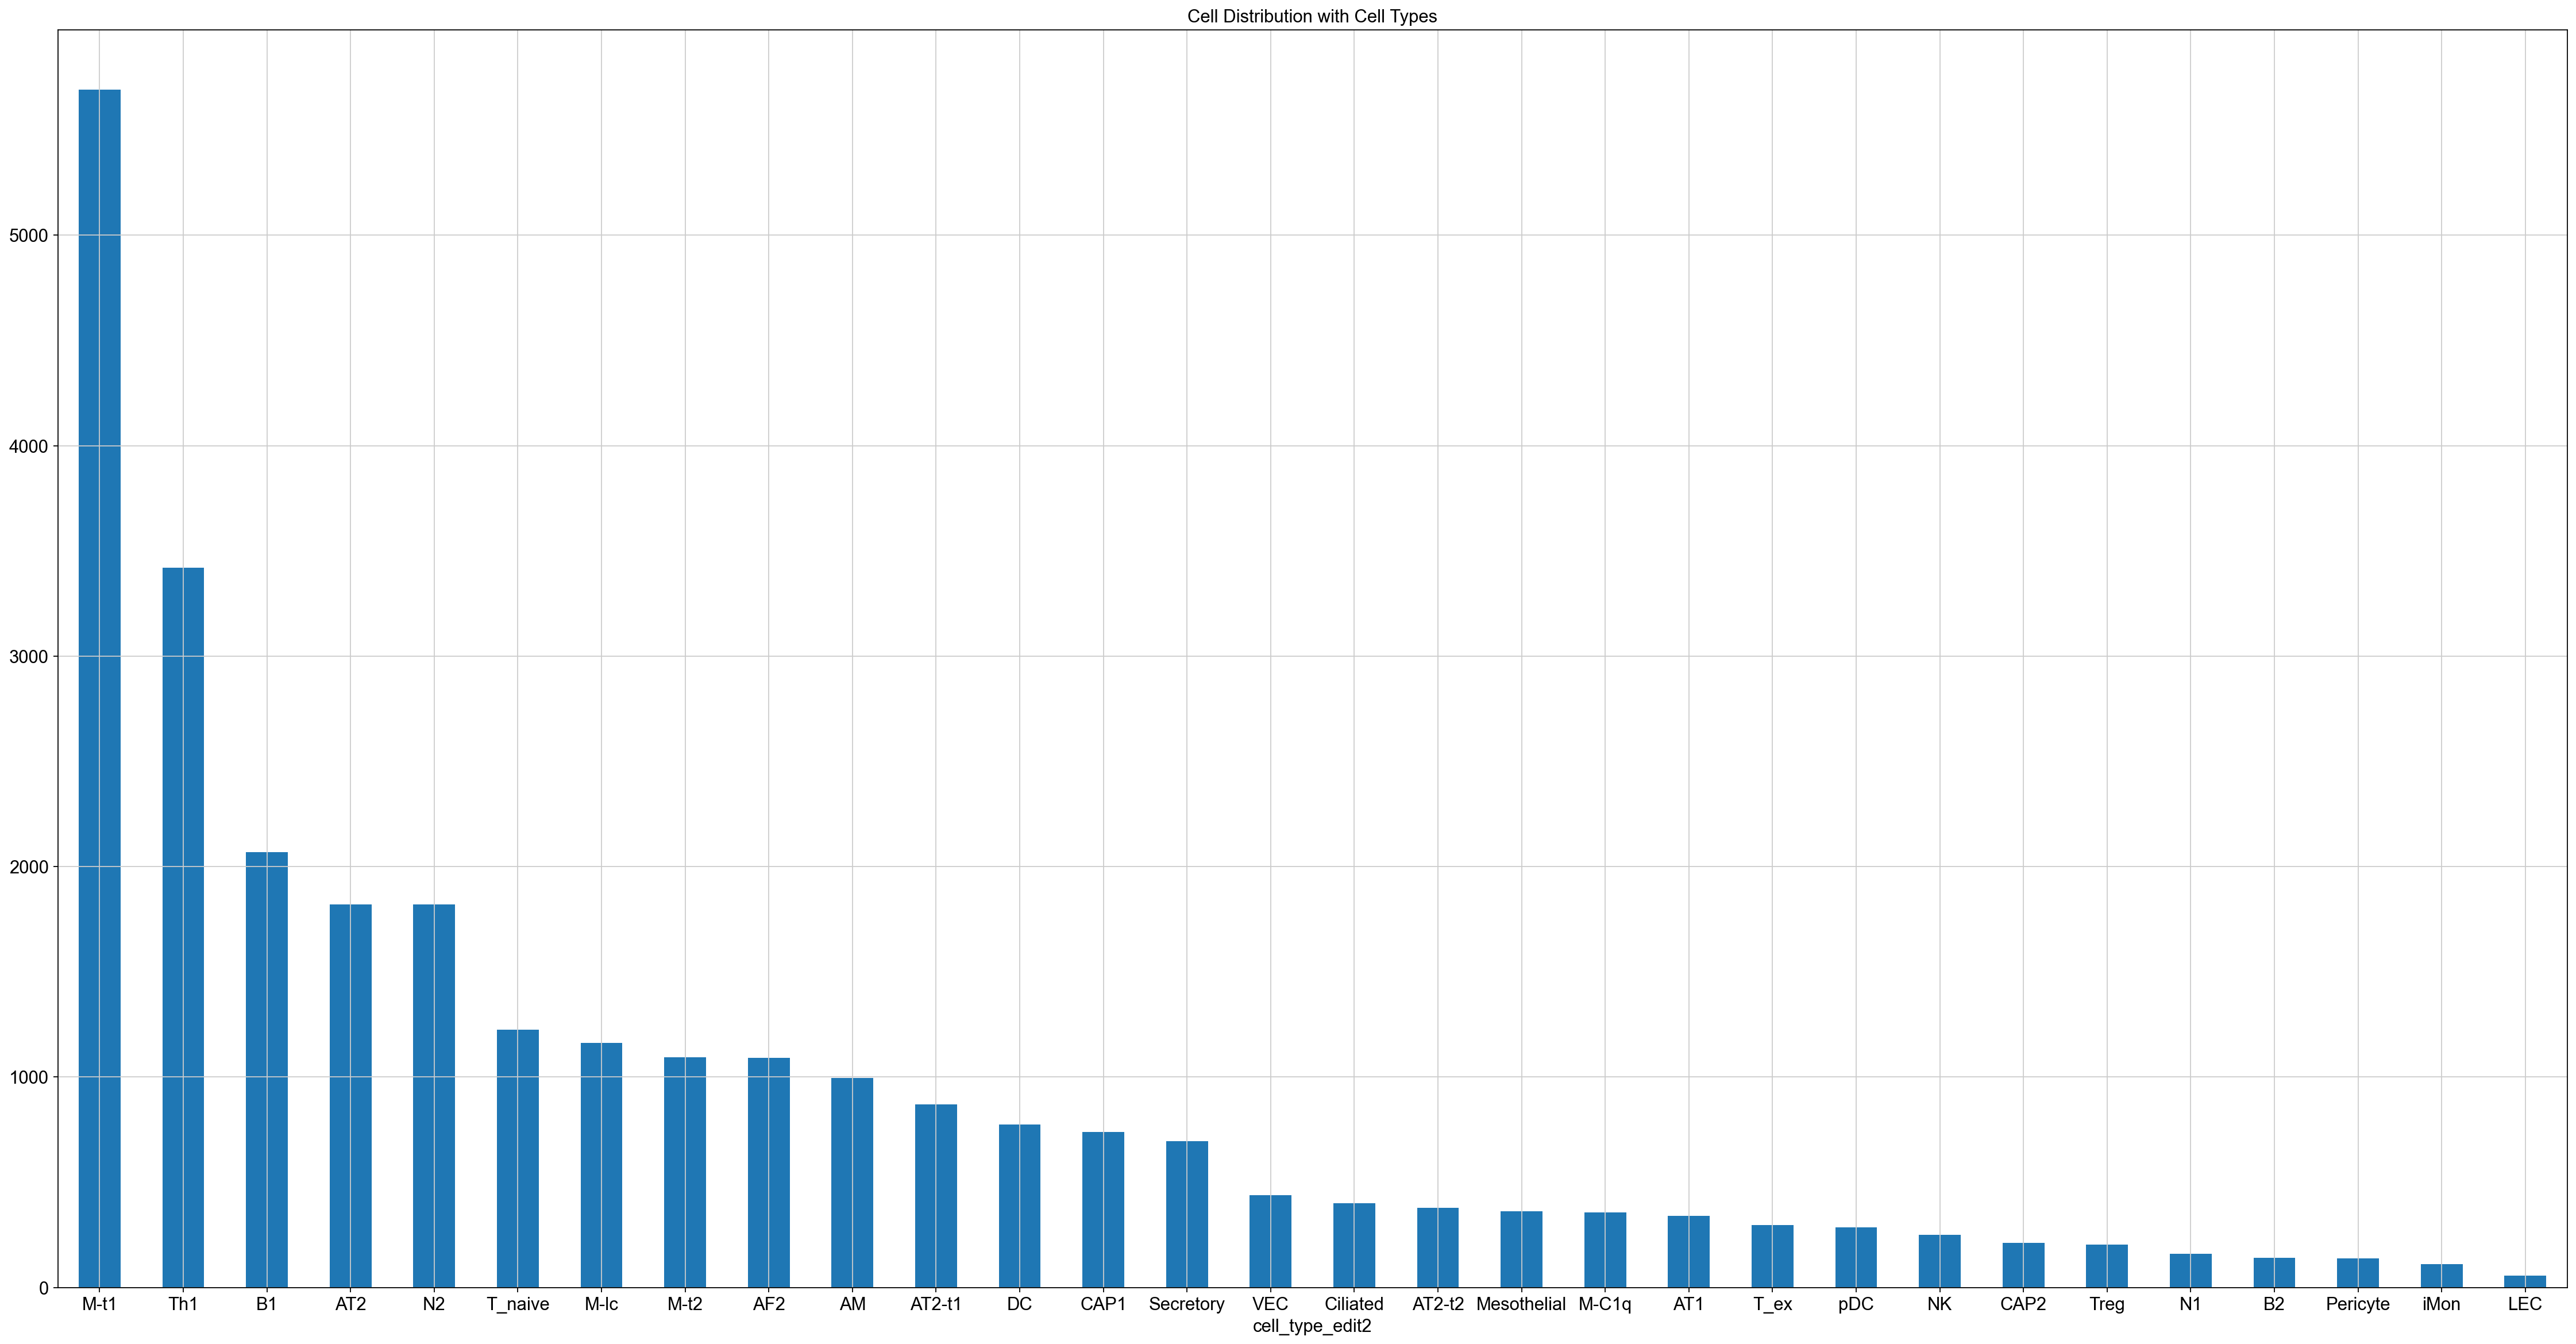

In [17]:
# cell distribution with cell types (hard to see)
y = adata.obs['cell_type_edit2']
plt.figure(figsize=(35, 18))
plt.title('Cell Distribution with Cell Types')
y.value_counts().plot(kind='bar', rot=0)
plt.show()

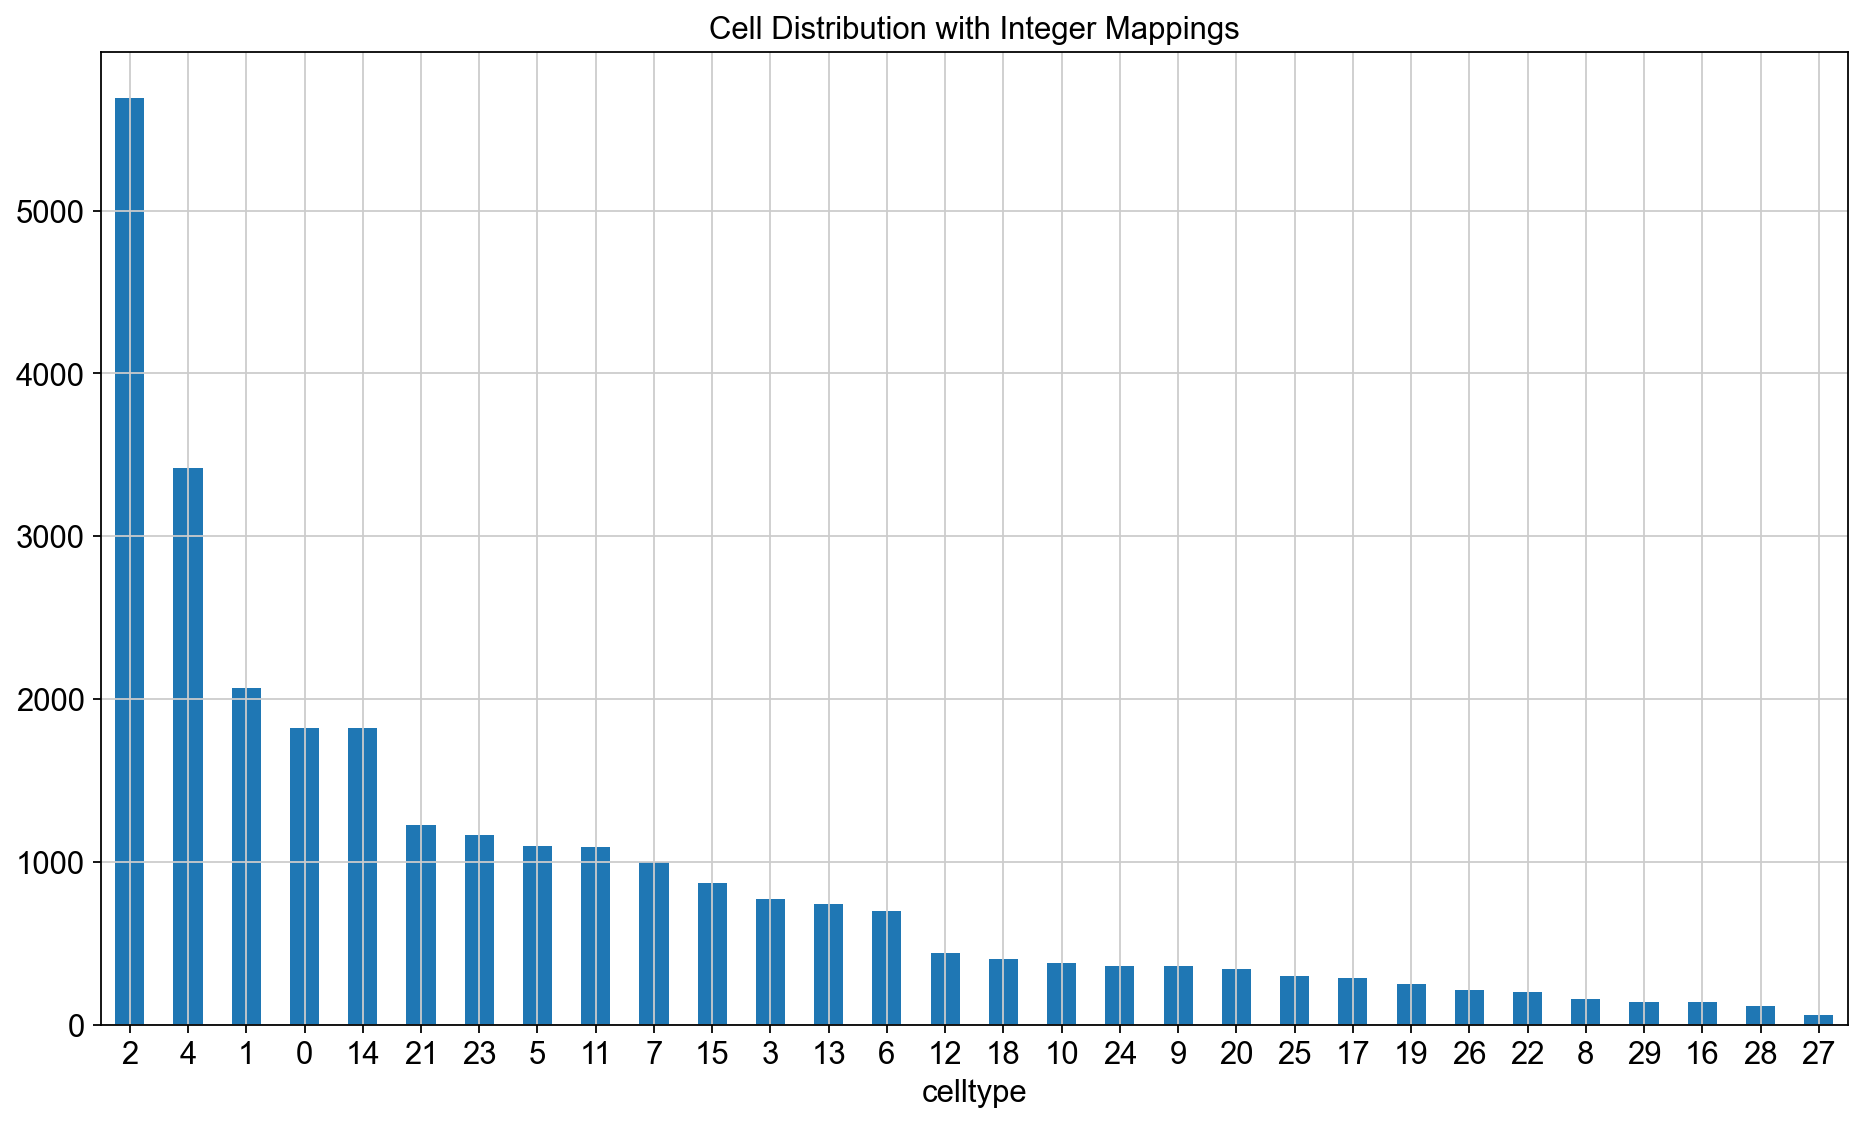

In [18]:
# cell distribution with int mappings (easy to see)
y = adata.obs['celltype']
plt.figure(figsize=(14, 8))
plt.title('Cell Distribution with Integer Mappings')
y.value_counts().plot(kind='bar', rot=0)
plt.show()

In [19]:
# Extract gene expression values (X) and cell types (y) from the adata object
# If adata.X is already a numpy array, just use it directly

X = adata.X  # No need for .toarray() if it's already a numpy array
y = adata.obs['celltype'].values  # Extract the cell types as a numpy array

train_features, test_features, train_labels, test_labels = train_test_split(X, y, test_size = 0.2, random_state=42)
train_features, val_features, train_labels, val_labels = train_test_split(train_features, train_labels, test_size = 0.25, random_state=42)

train_features = np.array(train_features)
test_features = np.array(test_features)
val_features = np.array(val_features)

train_labels = np.array(train_labels)
test_labels = np.array(test_labels)
val_labels = np.array(val_labels)

# Print the shape of the training and testing sets
print('Training features shape:', train_features.shape)
print('Validation features shape:', val_features.shape)
print('Test features shape:', test_features.shape)

print('Training labels shape:', train_labels.shape)
print('Validation labels shape:', val_labels.shape)
print('Test labels shape:', test_labels.shape)

Training features shape: (16561, 23693)
Validation features shape: (5521, 23693)
Test features shape: (5521, 23693)
Training labels shape: (16561,)
Validation labels shape: (5521,)
Test labels shape: (5521,)


In [20]:
print(y)
print(len(y))

[ 0  1  2 ...  2  2 20]
27603


In [21]:
print(X)
print(len(X))

[[0.         0.         0.         ... 0.         0.         0.65802306]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.9530956 ]
 ...
 [0.         0.         0.         ... 0.         0.         0.40804082]
 [0.         0.         0.         ... 0.         0.39723676 1.0820873 ]
 [0.         0.         0.         ... 0.         0.         0.        ]]
27603


In [22]:
adata.obs['celltype']

AAACCTGAGCGTAGTG_sc69_1     0
AAACCTGAGCTGATAA_sc69_1     1
AAACCTGCAAATCCGT_sc69_1     2
AAACCTGCAAGGGTCA_sc69_1     3
AAACCTGCACATCCGG_sc69_1     2
                           ..
TTTGTCAGTTCAACCA_sc72_1     2
TTTGTCAGTTCAGTAC_sc72_1    21
TTTGTCATCACAAACC_sc72_1     2
TTTGTCATCAGCACAT_sc72_1     2
TTTGTCATCTCGAGTA_sc72_1    20
Name: celltype, Length: 27603, dtype: int64

In [23]:
sample_weights = compute_sample_weight(
    class_weight='balanced',
    y=train_labels
)

In [24]:
print(train_labels)
print(sample_weights)
print(len(sample_weights))

[7 0 1 ... 0 3 2]
[0.94851088 0.51066913 0.44482944 ... 0.51066913 1.1670895  0.16066162]
16561


In [27]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import joblib

# Normalize features
scaler = StandardScaler()
train_features = scaler.fit_transform(train_features)
val_features = scaler.transform(val_features)
test_features = scaler.transform(test_features)

# Convert to PyTorch tensors
X_train = torch.tensor(train_features, dtype=torch.float32)
y_train = torch.tensor(train_labels, dtype=torch.long)
X_val = torch.tensor(val_features, dtype=torch.float32)
y_val = torch.tensor(val_labels, dtype=torch.long)
X_test = torch.tensor(test_features, dtype=torch.float32)
y_test = torch.tensor(test_labels, dtype=torch.long)

# Define the neural network with Sigmoid activations
class NeuralNet(nn.Module):
    def __init__(self, input_size, num_classes):
        super(NeuralNet, self).__init__()
        self.layer1 = nn.Linear(input_size, 128)
        self.sigmoid1 = nn.Sigmoid()
        self.layer2 = nn.Linear(128, 64)
        self.sigmoid2 = nn.Sigmoid()
        self.output = nn.Linear(64, num_classes)
    
    def forward(self, x):
        x = self.sigmoid1(self.layer1(x))  # Apply sigmoid activation after the first layer
        x = self.sigmoid2(self.layer2(x))  # Apply sigmoid activation after the second layer
        x = self.output(x)                 # Output layer (no activation applied here)
        return x


# Initialize the model
input_size = train_features.shape[1]
num_classes = len(set(train_labels))  # Number of unique labels
model = NeuralNet(input_size, num_classes)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 50
batch_size = 32

for epoch in range(num_epochs):
    model.train()
    permutation = torch.randperm(X_train.size(0))
    
    for i in range(0, X_train.size(0), batch_size):
        indices = permutation[i:i+batch_size]
        batch_X, batch_y = X_train[indices], y_train[indices]

        # Forward pass
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Validation step
    model.eval()
    with torch.no_grad():
        val_outputs = model(X_val)
        val_loss = criterion(val_outputs, y_val)
        val_predictions = torch.argmax(val_outputs, axis=1)
        val_accuracy = (val_predictions == y_val).float().mean()
    
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, Val Loss: {val_loss.item():.4f}, Val Acc: {val_accuracy:.4f}")

# Save the model
torch.save(model.state_dict(), 'NeuralNetModel.pth')


Epoch [1/50], Loss: 0.5015, Val Loss: 0.5185, Val Acc: 0.8671
Epoch [2/50], Loss: 0.1474, Val Loss: 0.3041, Val Acc: 0.9131
Epoch [3/50], Loss: 0.0277, Val Loss: 0.2638, Val Acc: 0.9210
Epoch [4/50], Loss: 0.0244, Val Loss: 0.2580, Val Acc: 0.9219
Epoch [5/50], Loss: 0.0075, Val Loss: 0.2623, Val Acc: 0.9207
Epoch [6/50], Loss: 0.0057, Val Loss: 0.2687, Val Acc: 0.9218
Epoch [7/50], Loss: 0.0026, Val Loss: 0.2798, Val Acc: 0.9212
Epoch [8/50], Loss: 0.0031, Val Loss: 0.2973, Val Acc: 0.9192
Epoch [9/50], Loss: 0.0013, Val Loss: 0.3100, Val Acc: 0.9183
Epoch [10/50], Loss: 0.0015, Val Loss: 0.3117, Val Acc: 0.9185
Epoch [11/50], Loss: 0.0005, Val Loss: 0.3222, Val Acc: 0.9181
Epoch [12/50], Loss: 0.0007, Val Loss: 0.3283, Val Acc: 0.9192
Epoch [13/50], Loss: 0.0004, Val Loss: 0.3470, Val Acc: 0.9189
Epoch [14/50], Loss: 0.0006, Val Loss: 0.3443, Val Acc: 0.9199
Epoch [15/50], Loss: 0.0003, Val Loss: 0.3476, Val Acc: 0.9216
Epoch [16/50], Loss: 0.0003, Val Loss: 0.3589, Val Acc: 0.9198
E

In [28]:
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(7.7, 6))
    sb.heatmap(cm, annot=False, cmap='Blues', cbar=True,
               xticklabels=np.unique(y_true), yticklabels=np.unique(y_true))
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()


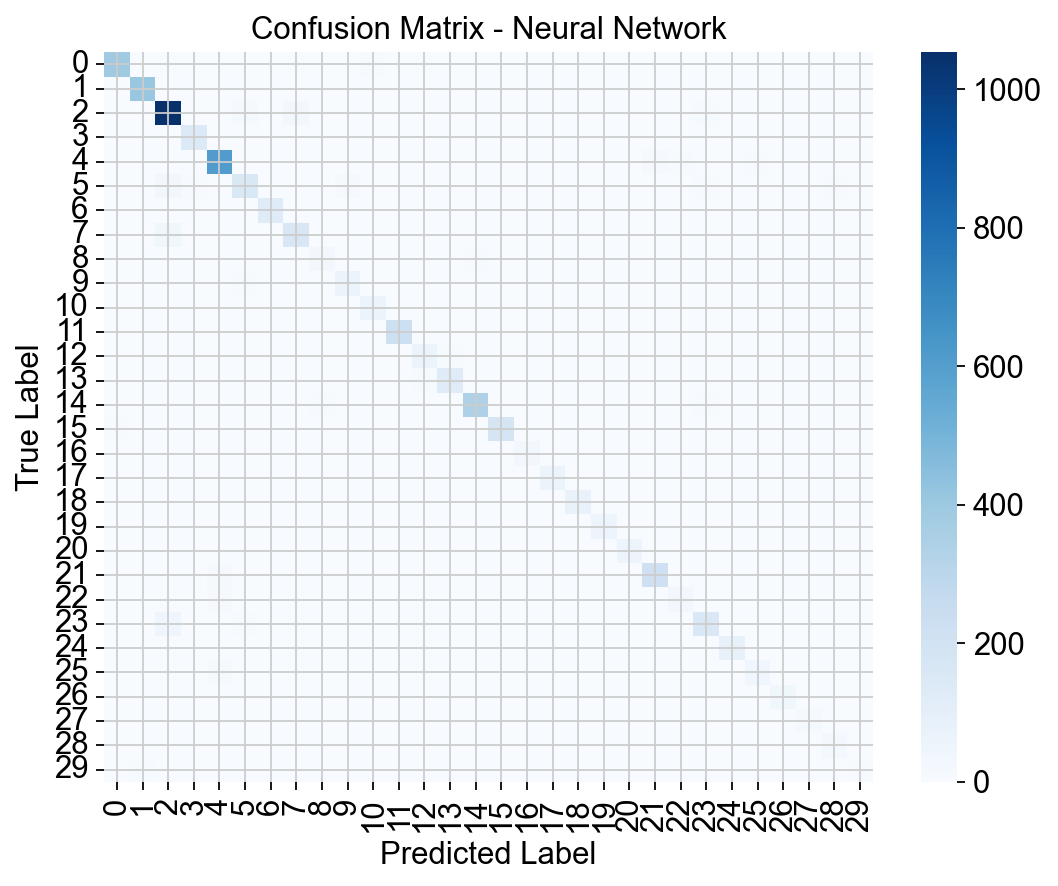

In [29]:
# Confusion matrix plot
model.eval()
with torch.no_grad():
    test_outputs = model(X_test)  # Logits from the neural network
    nn_pred = torch.argmax(test_outputs, axis=1).numpy()  # Convert logits to class labels

# Call the updated confusion matrix function
plot_confusion_matrix(y_test.numpy(), nn_pred, "Neural Network")

In [30]:
# Metrics of the Neural Network
model.eval()
with torch.no_grad():
    test_outputs = model(X_test)
    test_predictions = torch.argmax(test_outputs, axis=1)
    print(classification_report(y_test.numpy(), test_predictions.numpy()))


              precision    recall  f1-score   support

           0       0.98      0.98      0.98       400
           1       0.97      0.99      0.98       414
           2       0.90      0.94      0.92      1116
           3       0.93      0.97      0.95       152
           4       0.92      0.94      0.93       653
           5       0.79      0.72      0.75       219
           6       1.00      0.98      0.99       128
           7       0.84      0.78      0.81       208
           8       0.70      0.79      0.75        39
           9       0.79      0.78      0.78        77
          10       0.84      0.95      0.89        66
          11       1.00      0.98      0.99       231
          12       0.86      0.82      0.84        76
          13       0.90      0.93      0.91       139
          14       0.97      0.96      0.96       359
          15       0.97      0.95      0.96       189
          16       1.00      0.97      0.99        34
          17       1.00    